### Requirements

In [ ]:
%pip install -r requirements.txt

In [10]:
import allel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1000G Dataset

In [4]:
FOLDER_1000G = 'data/1000G_data/'

chr_22_path = FOLDER_1000G +'chr22_filtered.vcf.gz'
chr_22 = allel.read_vcf(chr_22_path, fields='*')


In [18]:
variants = chr_22['variants/CHROM']
positions = chr_22['variants/POS']
refs = chr_22['variants/REF']
alts = chr_22['variants/ALT']
sample_ids = chr_22['samples']

# Create a DataFrame of variants
variants_df = pd.DataFrame({
    'Chromosome': variants,
    'Position': positions,
    'REF': refs,
    'ALT': [alt[0] for alt in alts],  # ALT is an array; take the first element
})

variants_df


,Chromosome,Position,REF,ALT
0,22,16051249,T,C
1,22,16052080,G,A
2,22,16052962,C,T
3,22,16052986,C,A
4,22,16053444,A,T
...,...,...,...,...
97211,22,51235959,T,C
97212,22,51235979,G,A
97213,22,51237063,T,C
97214,22,51237712,G,A


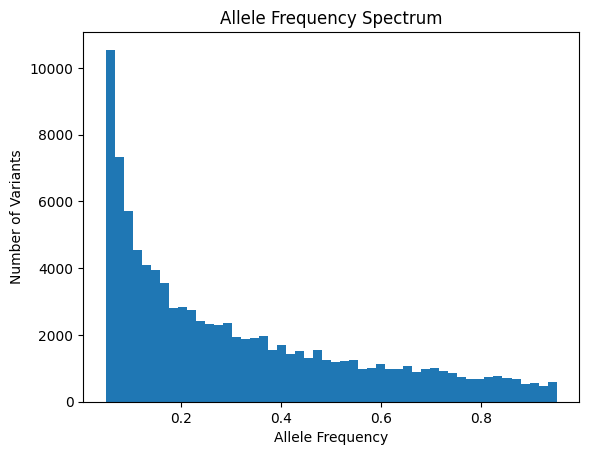

In [6]:
genotypes = chr_22['calldata/GT']
gt = allel.GenotypeArray(genotypes)
ac = gt.count_alleles()
af = ac.to_frequencies()[:, 1]  # Frequency of the alternate allele
plt.hist(af, bins=50)
plt.xlabel('Allele Frequency')
plt.ylabel('Number of Variants')
plt.title('Allele Frequency Spectrum')
plt.show()


In [7]:
geno_matrix = gt.to_n_alt().T  # Transpose to get samples as rows
geno_matrix.shape  # Should be (num_samples, num_variants)

(2504, 97216)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
geno_std = scaler.fit_transform(geno_matrix)

pca = PCA(n_components = 0.8)
principal_components = pca.fit(geno_std)

In [20]:
pca_df = pd.DataFrame(principal_components.components_.T, columns=[f'PC{i}' for i in range(principal_components.n_components_)])
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC884,PC885,PC886,PC887,PC888,PC889,PC890,PC891,PC892,PC893
0,-0.002835,-0.001193,-0.003033,-0.009065,0.001982,0.001292,-0.000365,0.001827,-0.000236,0.001680,...,0.005697,-0.005237,0.000972,0.002496,-0.000954,0.000083,0.000643,-0.000333,-0.005049,-0.001722
1,-0.002730,0.002588,0.004728,0.000788,0.000420,-0.000409,0.002020,0.000544,-0.000763,0.001342,...,0.010021,-0.000373,-0.007684,-0.002028,0.001002,-0.004677,-0.000440,-0.000539,-0.006476,0.001741
2,-0.002406,-0.001510,-0.003486,-0.009366,0.001060,0.001023,0.000038,0.000133,-0.000019,0.001816,...,0.003727,-0.004040,0.001846,0.000197,-0.002427,-0.000437,0.003757,-0.000156,-0.005361,0.002351
3,0.001808,0.000074,0.000143,0.001026,0.001502,0.001089,0.001737,0.001539,-0.000067,0.001040,...,-0.001191,-0.003305,0.005892,0.003988,-0.002991,0.005160,-0.004995,-0.000837,-0.000693,0.000919
4,0.001643,0.000033,0.000092,0.001087,0.001578,0.001029,0.001861,0.001471,0.000003,0.001262,...,0.000222,-0.002459,0.007404,0.005031,-0.002757,0.004691,-0.006170,-0.000782,-0.002173,0.002652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97211,-0.003775,0.000227,-0.008349,-0.005033,-0.000979,0.001322,-0.000256,0.001879,-0.002897,0.000652,...,0.007064,0.002313,0.003648,0.005540,-0.002977,0.001178,-0.007887,0.003793,0.004696,0.000103
97212,0.001079,-0.001479,0.003756,0.001928,0.000241,-0.000008,0.001685,-0.001116,-0.000025,-0.000180,...,-0.004935,-0.002944,-0.006804,0.004393,-0.000806,-0.003267,0.006764,-0.003931,0.003369,-0.005515
97213,-0.002883,0.000983,0.003119,0.004146,0.000468,-0.001509,0.000932,0.000359,0.003955,-0.001373,...,0.002956,-0.002697,0.001647,-0.001263,0.000323,0.004711,-0.001827,-0.002162,-0.001154,0.004144
97214,0.002814,-0.000250,0.000357,0.001920,-0.000784,0.000096,0.000489,0.001177,-0.002710,0.000717,...,0.004737,-0.000650,0.003872,-0.005879,0.001320,-0.001668,0.001661,0.008319,-0.000613,0.001952


In [24]:
sample_info = pd.read_csv(FOLDER_1000G+'integrated_call_samples_v3.20130502.ALL.panel', sep='\t')
merged_data = pd.concat([sample_info, pca_df], axis=1)
merged_data

,sample,pop,super_pop,gender,PC0,PC1,PC2,PC3,PC4,PC5,...,PC884,PC885,PC886,PC887,PC888,PC889,PC890,PC891,PC892,PC893
0,HG00096,GBR,EUR,male,-0.002835,-0.001193,-0.003033,-0.009065,0.001982,0.001292,...,0.005697,-0.005237,0.000972,0.002496,-0.000954,0.000083,0.000643,-0.000333,-0.005049,-0.001722
1,HG00097,GBR,EUR,female,-0.002730,0.002588,0.004728,0.000788,0.000420,-0.000409,...,0.010021,-0.000373,-0.007684,-0.002028,0.001002,-0.004677,-0.000440,-0.000539,-0.006476,0.001741
2,HG00099,GBR,EUR,female,-0.002406,-0.001510,-0.003486,-0.009366,0.001060,0.001023,...,0.003727,-0.004040,0.001846,0.000197,-0.002427,-0.000437,0.003757,-0.000156,-0.005361,0.002351
3,HG00100,GBR,EUR,female,0.001808,0.000074,0.000143,0.001026,0.001502,0.001089,...,-0.001191,-0.003305,0.005892,0.003988,-0.002991,0.005160,-0.004995,-0.000837,-0.000693,0.000919
4,HG00101,GBR,EUR,male,0.001643,0.000033,0.000092,0.001087,0.001578,0.001029,...,0.000222,-0.002459,0.007404,0.005031,-0.002757,0.004691,-0.006170,-0.000782,-0.002173,0.002652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97211,NaN,NaN,NaN,NaN,-0.003775,0.000227,-0.008349,-0.005033,-0.000979,0.001322,...,0.007064,0.002313,0.003648,0.005540,-0.002977,0.001178,-0.007887,0.003793,0.004696,0.000103
97212,NaN,NaN,NaN,NaN,0.001079,-0.001479,0.003756,0.001928,0.000241,-0.000008,...,-0.004935,-0.002944,-0.006804,0.004393,-0.000806,-0.003267,0.006764,-0.003931,0.003369,-0.005515
97213,NaN,NaN,NaN,NaN,-0.002883,0.000983,0.003119,0.004146,0.000468,-0.001509,...,0.002956,-0.002697,0.001647,-0.001263,0.000323,0.004711,-0.001827,-0.002162,-0.001154,0.004144
97214,NaN,NaN,NaN,NaN,0.002814,-0.000250,0.000357,0.001920,-0.000784,0.000096,...,0.004737,-0.000650,0.003872,-0.005879,0.001320,-0.001668,0.001661,0.008319,-0.000613,0.001952


In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=merged_data,
    x='PC1',
    y='PC2',
    hue='super_pop',
    palette='Set1'
)
plt.title('PCA of Genomic Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Superpopulation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ValueError: Could not interpret value `Superpopulation` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>

## Direct

In [10]:

import os
print(os.getcwd())



pca_data = pd.read_csv(FOLDER_1000G+'chr22_pca.eigenvec', delim_whitespace=True, header=None)
pca_data.columns = ['FID', 'IID'] + [f'PC{i}' for i in range(1, 21)]  # Adjust if more PCs are available

# Load sample info
sample_info = pd.read_csv(FOLDER_1000G+'integrated_call_samples_v3.20130502.ALL.panel', sep='\t')
sample_info


/home/skander/repos/ando-genetics


/tmp/ipykernel_204496/728478199.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_data = pd.read_csv(FOLDER_1000G+'chr22_pca.eigenvec', delim_whitespace=True, header=None)


,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [13]:
# Merge PCA data with sample info on the sample ID
merged_data = pca_data.merge(sample_info, left_on='IID', right_on='sample')

# Check for unmatched samples
unmatched_samples = set(pca_data['IID']) - set(sample_info['sample'])
if unmatched_samples:
    print(f"Unmatched samples: {unmatched_samples}")
else:
    print("All samples matched successfully.")


All samples matched successfully.


In [11]:
# Continue with clustering as before
from sklearn.cluster import KMeans

pcs = merged_data[[f'PC{i}' for i in range(1, 11)]]

kmeans = KMeans(n_clusters=5, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(pcs)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=merged_data, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('PCA Clustering of Genomic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


NameError: name 'merged_data' is not defined